# CS765 PROJECT

### Demo from https://github.com/Axelrod-Python/Axelrod

In [164]:
# install the requirements.txt, if you have an error install axelrod-dojo first, with instructions below
# pip install -r requirements.txt

In [2]:
import axelrod as axl
import matplotlib.pyplot as plt

In [3]:
players = [s() for s in axl.demo_strategies]  # Create players

# Strategies from the demo:
axl.demo_strategies

[axelrod.strategies.cooperator.Cooperator,
 axelrod.strategies.defector.Defector,
 axelrod.strategies.titfortat.TitForTat,
 axelrod.strategies.grudger.Grudger,
 axelrod.strategies.rand.Random]

In [4]:
tournament = axl.Tournament(players, turns=4, repetitions=2, seed=42)  # Create a tournament
# results = tournament.play(processes=0)  # Play the tournament
results = tournament.play(processes=0)  # Play the tournament Multicore


Analysing: 100%|██████████| 25/25 [00:00<00:00, 385.78it/s]


In [5]:
results.ranked_names

['Defector', 'Random: 0.5', 'Grudger', 'Tit For Tat', 'Cooperator']

In [169]:
plot = axl.Plot(results)


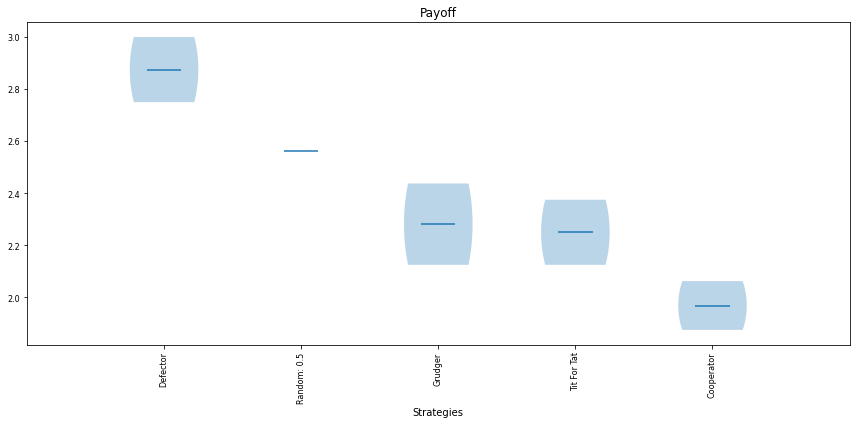

In [170]:
# set up plot labels
_, ax = plt.subplots()
ax.set_title('Payoff')
ax.set_xlabel('Strategies')
# draw the plot
p = plot.boxplot(ax=ax)

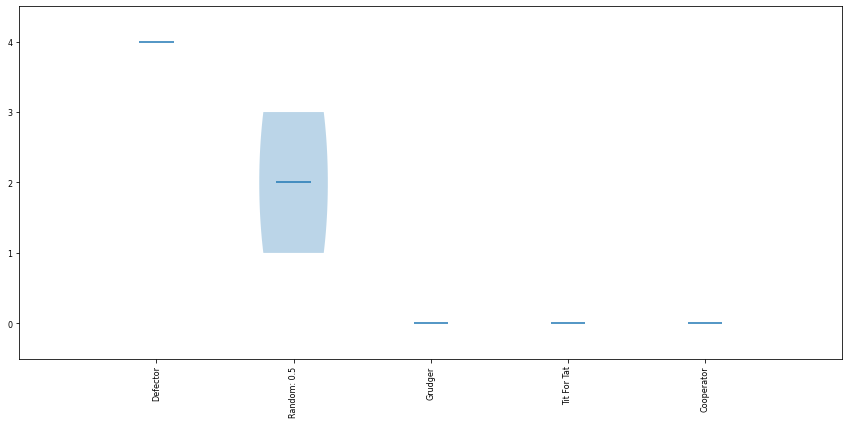

In [171]:
# Visualising the distributions of wins
p = plot.winplot()

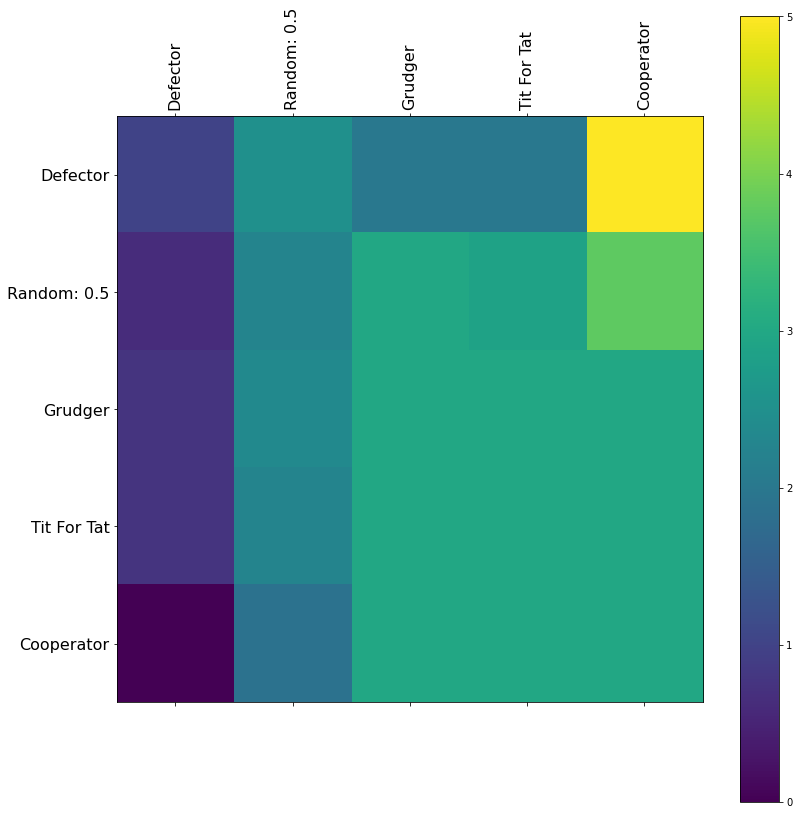

In [172]:
# Visualising the payoff matrix
p = plot.payoff()

### Axelrod Dojo
To install axelrod dojo: <br>
>
`cd axelrod-dojo-master` <br>
`python setup.py develop` <br> 
>
You can also try: <br>
>
`pip install axelrod_dojo` <br>
>
but for me it didn't work, I recieved error, probably because I'm on python 3.10

In [6]:
import axelrod_dojo as dojo

#### Tutorial from Axelrod-Dojo

In [7]:
opponents = [axl.TitForTat(), axl.Alternator(), axl.Defector()]
opponents

[Tit For Tat, Alternator, Defector]

In [9]:
# We are now going to prepare the training algorithm. First of all, we need to prepare the 
# objective of our strategy. 
# In this case we will aim to maximise score in a match with 10 turns over 1 repetition:

objective = dojo.prepare_objective(name="score", turns=10, repetitions=1)

In [191]:
# The algorithm we are going to use is a genetic algorithm which requires a population of individuals. 
# Let us set up the inputs:

params_class = axl.EvolvableFSMPlayer
params_kwargs = {"num_states": 2, "seed":11}


In [192]:
population = dojo.Population(player_class=params_class,
                                params_kwargs=params_kwargs,
                                size=20,
                                objective=objective,
                                output_filename="training_output.csv",
                                opponents=opponents,
                                bottleneck=2,
                                mutation_probability=.1
                            )

In [193]:
generations = 10
population.run(generations)


Scoring Generation 1
Generation 1 | Best Score: 1.5666666666666664
Scoring Generation 2
Generation 2 | Best Score: 1.8666666666666665
Scoring Generation 3
Generation 3 | Best Score: 1.8666666666666665
Scoring Generation 4
Generation 4 | Best Score: 1.8666666666666665
Scoring Generation 5
Generation 5 | Best Score: 1.8666666666666665
Scoring Generation 6
Generation 6 | Best Score: 1.8666666666666665
Scoring Generation 7
Generation 7 | Best Score: 1.8666666666666665
Scoring Generation 8
Generation 8 | Best Score: 1.8666666666666665
Scoring Generation 9
Generation 9 | Best Score: 1.8666666666666665
Scoring Generation 10
Generation 10 | Best Score: 1.8666666666666665


In [179]:
#population.population

In [194]:
GA_player = population.population[0]
GA_player.__repr__()

'EvolvableFSMPlayer: ((0, C, 1, D), (0, D, 1, C), (1, C, 1, D), (1, D, 0, D)), 1, D, 2, 0.1, 4045028768'

In [197]:
players = opponents + [GA_player]
players



[Tit For Tat,
 Alternator,
 Defector,
 EvolvableFSMPlayer: ((0, C, 1, D), (0, D, 1, C), (1, C, 1, D), (1, D, 0, D)), 1, D, 2, 0.1, 4045028768]

In [198]:
tournament = axl.Tournament(players, turns=4, repetitions=2, seed=42)  # Create a tournament
results = tournament.play()  # Play the tournament

Analysing: 100%|██████████| 25/25 [00:00<00:00, 84.04it/s]


In [199]:
plot = axl.Plot(results)

In [200]:
for i in range(len(results.ranked_names)):
    results.ranked_names[i] = results.ranked_names[i].split(':')[0]
results.ranked_names



['Defector', 'EvolvableFSMPlayer', 'Tit For Tat', 'Alternator']

In [201]:
for i in range(len(plot.players)):
    plot.players[i] = plot.players[i].split(':')[0]
plot.players

['Tit For Tat', 'Alternator', 'Defector', 'EvolvableFSMPlayer']

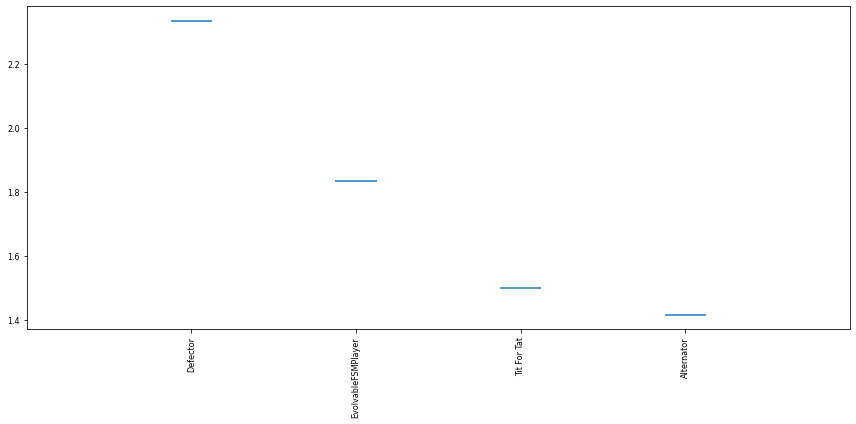

In [203]:
p = plot.boxplot()


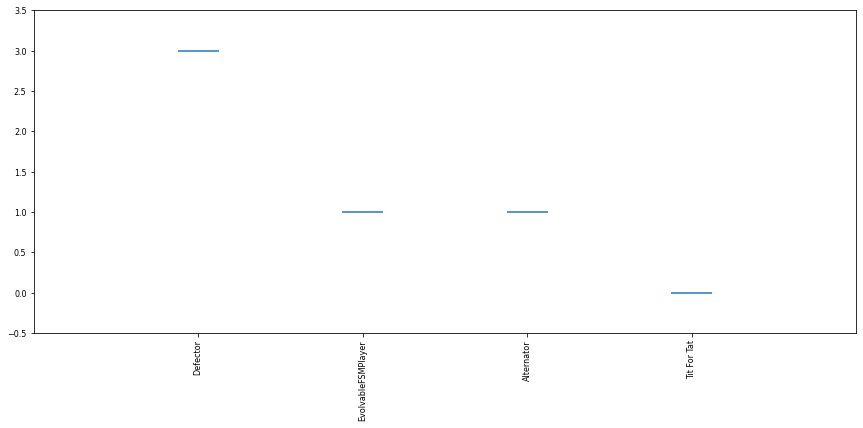

In [204]:
# Visualising the distributions of wins
p = plot.winplot()

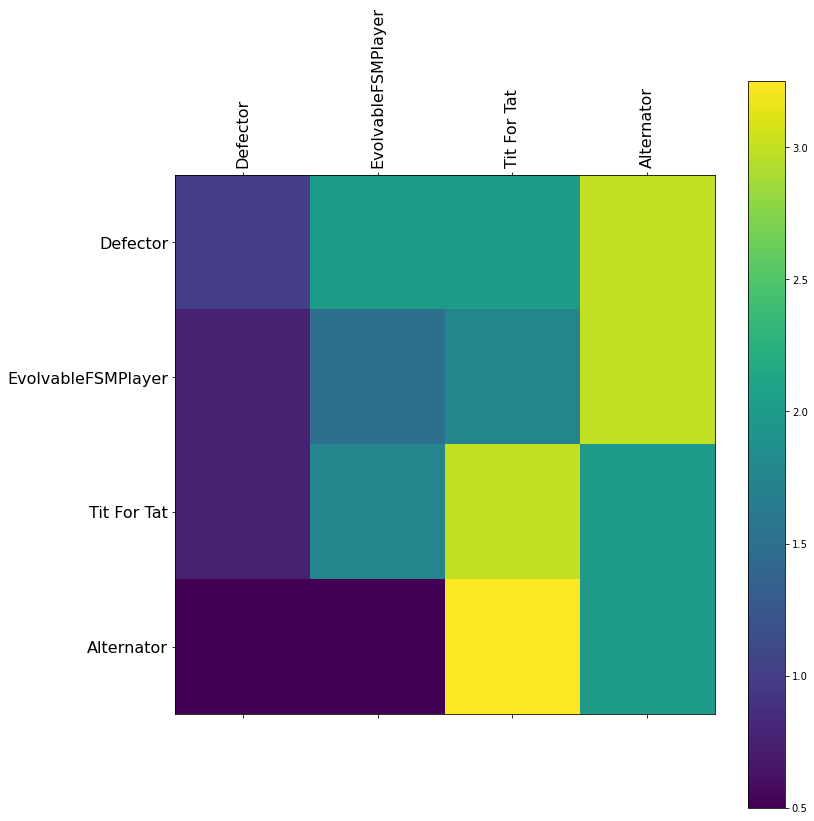

In [205]:
p = plot.payoff()

In [206]:
population.run(generations)

Scoring Generation 11
Generation 11 | Best Score: 1.8666666666666665
Scoring Generation 12
Generation 12 | Best Score: 1.8666666666666665
Scoring Generation 13
Generation 13 | Best Score: 1.8666666666666665
Scoring Generation 14
Generation 14 | Best Score: 1.8666666666666665
Scoring Generation 15
Generation 15 | Best Score: 1.8666666666666665
Scoring Generation 16
Generation 16 | Best Score: 1.8666666666666665
Scoring Generation 17
Generation 17 | Best Score: 1.8666666666666665
Scoring Generation 18
Generation 18 | Best Score: 1.8666666666666665
Scoring Generation 19
Generation 19 | Best Score: 1.8666666666666665
Scoring Generation 20
Generation 20 | Best Score: 1.8666666666666665
